In [1]:
import numpy as np

inputs = [1, 2, 3, 2.5]

weights = [[ 0.2, 0.8, - 0.5, 1 ],
           [ 0.5, - 0.91, 0.26, - 0.5 ],
           [ - 0.26, - 0.27, 0.17, 0.87 ]]

biases = [2, 3, 0.5]

outputs = np.dot(weights, inputs) + biases

# Or Use this method 
# np.dot(inputs, weights.T) + biases

print (outputs)

[4.8   1.21  2.385]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = np.array([0, 0, 1, 1])
b = np.array([0, 1, 0, 1])

# y_and = np.array([[0, 0, 0, 1]])
y_xor = np.array([[0,1,1,0]])

In [4]:
total_input = []

total_input = [a, b]
    
total_input = np.array(total_input)

In [5]:
# Define the sigmoid activation function:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# Define the number of neurons
input_neurons, hidden_neurons, output_neurons = 2, 2, 1

# Total training examples
samples = total_input.shape[1]

# Learning rate
lr = 0.1

# Define random seed to replicate the outputs
np.random.seed(42)

In [14]:
# Initializing the weights for hidden and output layers

w1 = np.random.rand(hidden_neurons, input_neurons)
w2 = np.random.rand(output_neurons, hidden_neurons)

In [7]:
# Forward propagation
def forward_prop(w1, w2, x):
    z1 = np.dot(w1, x)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2, a1) 
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# Backward propagation
def back_prop(m, w1, w2, z1, a1, z2, a2, y):
    
    dz2 = a2-y
    dw2 = np.dot(dz2, a1.T)/m
    dz1 = np.dot(w2.T, dz2) * a1*(1-a1)
    dw1 = np.dot(dz1, total_input.T)/m
    dw1 = np.reshape(dw1, w1.shape)
    
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1

Text(0, 0.5, 'Loss value')

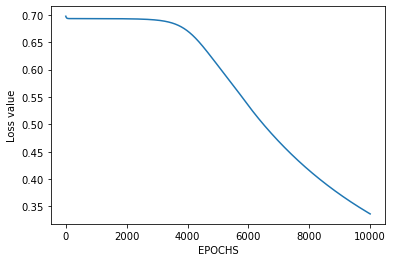

In [11]:
losses = []
iterations = 10000

for i in range(iterations):
    z1, a1, z2, a2 = forward_prop(w1, w2, total_input)
    loss = -(1/samples)*np.sum(y_xor*np.log(a2)+(1-y_xor)*np.log(1-a2))
    losses.append(loss)
    da2, dw2, dz1, dw1 = back_prop(samples, w1, w2, z1, a1, z2, a2, y_xor)
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [12]:
# Creating the predict function

def predict(w1,w2,input):
    z1, a1, z2, a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    
    if a2>=0.5:
        print("For input", [i[0] for i in input], a2, "output is 1")
    else:
        print("For input", [i[0] for i in input], a2,"output is 0")

In [13]:
test = np.array([[0],[0]])
predict(w1,w2,test)

test = np.array([[0],[1]])
predict(w1,w2,test)

test = np.array([[1],[0]])
predict(w1,w2,test)

test = np.array([[1],[1]])
predict(w1,w2,test)

For input [0, 0] 0.2137342790968918 output is 0
For input [0, 1] 0.7323600580450425 output is 1
For input [1, 0] 0.7324809803267608 output is 1
For input [1, 1] 0.3824409434267071 output is 0
